In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import json
import pprint
import matplotlib.pyplot as plt
import folium
from pathlib import Path

sys.path.append('../')
from map import Map
from optimizer import *
from tools import *

plt.rcParams['figure.figsize'] = [48, 32] # default is [6.0, 4.0], good value is [24, 16]
plt.rcParams['figure.dpi'] = 50 # default is 72, good value is 50

In [2]:
# Select data here
case = "aiguillemidi3"

In [3]:
# Load data file
casedir = Path("../data/") / case
with open(casedir / "info.json") as info:
    data = json.load(info)

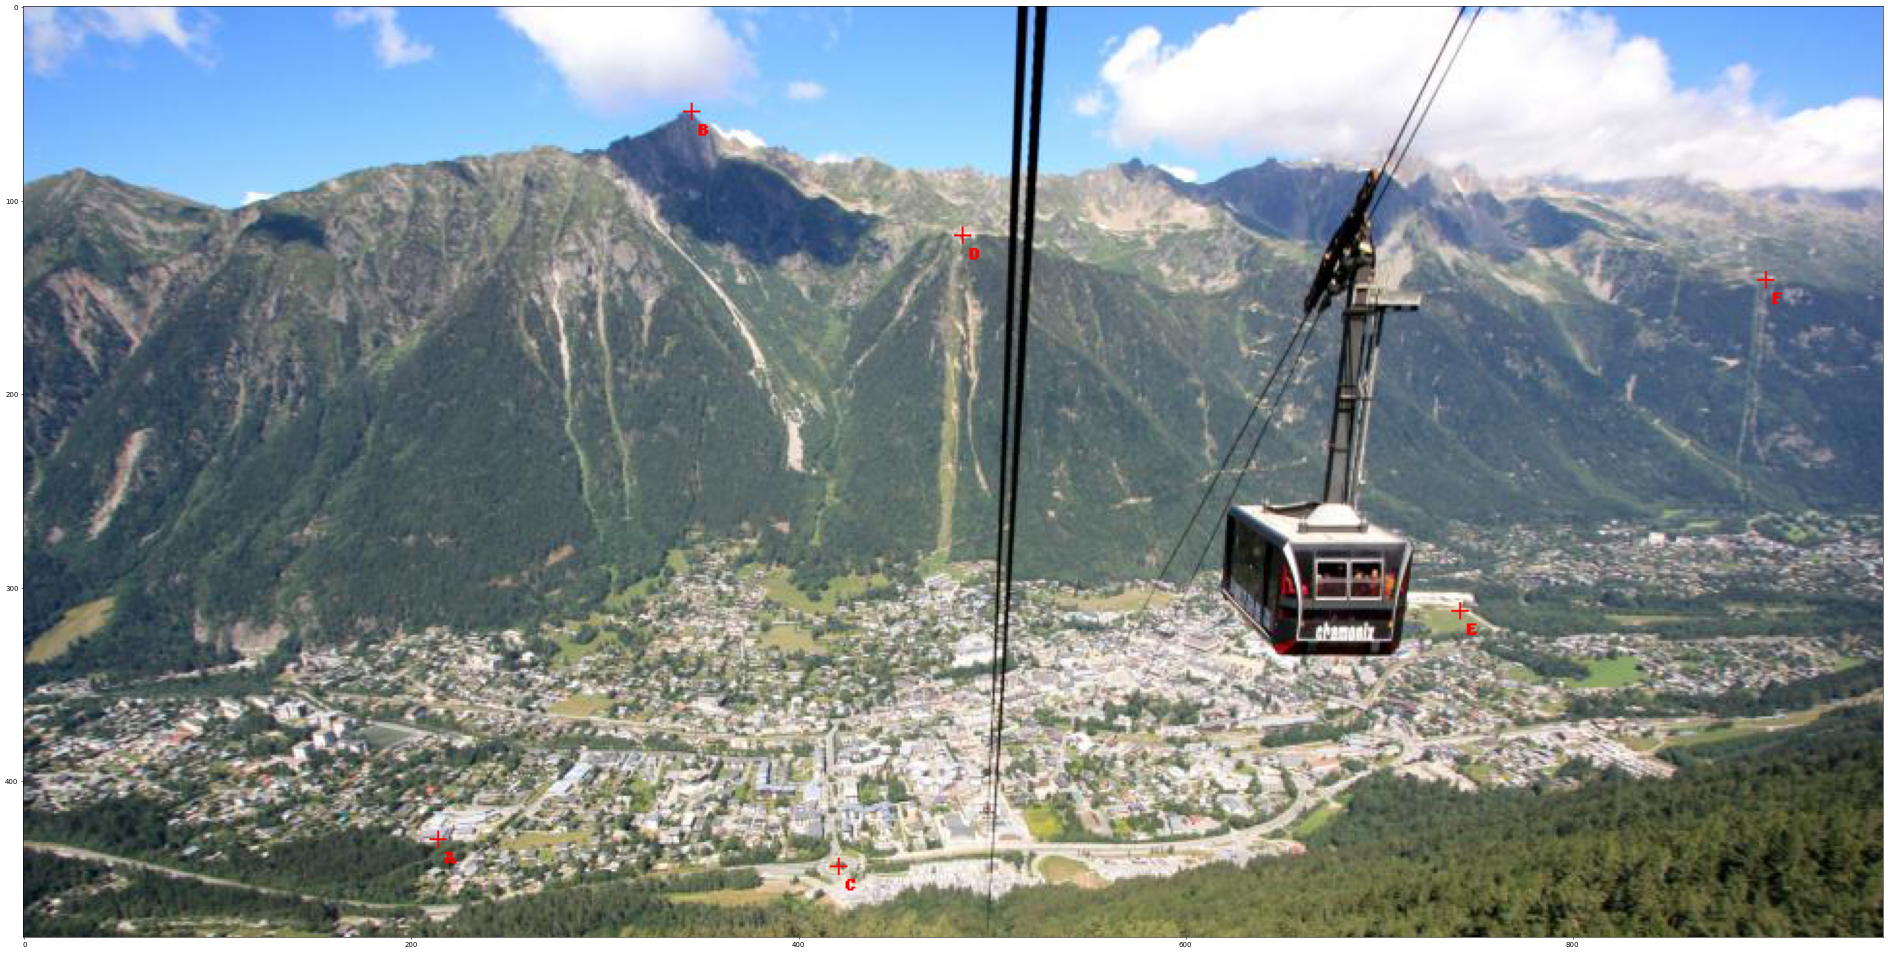

In [4]:
# Annotate picture
pic = Map(casedir / data['picture'])
for p, name in zip(data['projections'], "ABCDEFGHIJKLMNOPQRSTUVWXYZ"):
    pic.draw_point(p, name=name, color='red')
pic.show()

# Search based on lat & lng

In [5]:
# Create a map centered on first topic
m = folium.Map(location=data['latlngs'][0])

# Draw the summits on the map
for (p, name) in zip(data['latlngs'], "ABCDEFGHIKLMNOPQRSTUVWXYZ"):
    folium.Marker(
        p, popup=str(p),
        tooltip=name,
        icon=folium.Icon(icon="picture")
    ).add_to(m)

# Draw the known position of the photograper if available
if "photographer_latlng" in data:
    folium.Marker(
        data["photographer_latlng"],
        popup=str(data["photographer_latlng"]),
        tooltip="real",
        icon=folium.Icon(icon="camera", color="red")
    ).add_to(m)
    
# Run the optimizer
photographer, error, path, area, init = find_photographer_wsg84(
    latlngs=data['latlngs'],
    projections=[p[0] for p in data['projections']]
)

# Display outcome of the optimization
folium.Marker(
    init, popup=str(init),
    tooltip="init",
    icon=folium.Icon(icon="info-sign", color="red")
).add_to(m)

folium.Marker(
    photographer, popup=str(photographer),
    tooltip="computed",
    icon=folium.Icon(icon="screenshot", color="red")
).add_to(m)

folium.PolyLine(
    locations=area + [area[0]],
    popup="Area",
    tooltip="Area",
    color="red"
).add_to(m)

folium.PolyLine(
    locations=path,
    popup="Path",
    tooltip="Path",
    color="green"
).add_to(m)

m